## save my precious data

In [1]:
from datasets import DatasetDict, load_from_disk

dataset = DatasetDict({
    'trivial': load_from_disk('data/train/trivial'),
    'advanced': load_from_disk('data/train/advanced'),
    'crazy': load_from_disk('data/train/crazy')
})

/home/alekseev/dialogue-augmentation/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset.push_to_hub('voorhs/augmented')

README.md: 100%|██████████| 657/657 [00:00<00:00, 90.6kB/s]


CommitInfo(commit_url='https://huggingface.co/datasets/voorhs/augmented/commit/8ca9f8af7b776888a7b762ee58266ad92e58dedb', commit_message='Upload dataset', commit_description='', oid='8ca9f8af7b776888a7b762ee58266ad92e58dedb', pr_url=None, pr_revision=None, pr_num=None)

## testing multiwoz-1-domain

In [1]:
from mylib.datasets import MultiWOZServiceClfDataset

dataset = MultiWOZServiceClfDataset(path='data/multiwoz', split='train')
len(dataset)

8437

In [3]:
dataset = MultiWOZServiceClfDataset(path='data/multiwoz', split='validation')
len(dataset)

1000

In [2]:
dataset = MultiWOZServiceClfDataset(path='data/multiwoz-1-domain', split='train')
len(dataset)

3250

In [5]:
dataset = MultiWOZServiceClfDataset(path='data/multiwoz-1-domain', split='validation')
len(dataset)

209

## backbone list

In [1]:
hf_models = [
    'google-bert/bert-base-uncased',
    'Shitao/RetroMAE',
    'FacebookAI/roberta-base',
    'WhereIsAI/UAE-Large-V1'
]

In [3]:
from transformers import AutoTokenizer

for m in hf_models:
    tokenizer = AutoTokenizer.from_pretrained(m)
    print(m, tokenizer.all_special_tokens)


google-bert/bert-base-uncased ['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]']
Shitao/RetroMAE ['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]']
FacebookAI/roberta-base ['<s>', '</s>', '<unk>', '<pad>', '<mask>']
WhereIsAI/UAE-Large-V1 ['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]']


In [4]:
t = AutoTokenizer.from_pretrained('FacebookAI/roberta-base')
t.cls_token

'<s>'

## prune demo

In [4]:
import json

dias = json.load(open('data/augmented/prune-test/00000.json', 'r'))

In [7]:
dias[2]

{'content': [{'speaker': 0, 'utterance': 'Hello.'},
  {'speaker': 0,
   'utterance': 'I am looking for a flight from JFK to MSP, can you help me in booking?'},
  {'speaker': 0, 'utterance': 'Myself Katherine Jones.'},
  {'speaker': 0,
   'utterance': 'I would like to return my journey for the morning flight.'},
  {'speaker': 0,
   'utterance': "That's ok, no problem. Thank you for the information."}],
 'source_dataset_name': 'AirDialogue',
 'idx_within_source': 268933,
 'id': 443619}

## domain datasets

In [4]:
from datasets import load_from_disk

dataset = load_from_disk('data/benchmarks/SGD')
dataset

DatasetDict({
    train: Dataset({
        features: ['content', 'source_dataset_name', 'idx_within_source', 'services'],
        num_rows: 5403
    })
    validation: Dataset({
        features: ['content', 'source_dataset_name', 'idx_within_source', 'services'],
        num_rows: 836
    })
    test: Dataset({
        features: ['content', 'source_dataset_name', 'idx_within_source', 'services'],
        num_rows: 1806
    })
})

In [5]:
# from mylib.datasets import DomainDataset

# dataset = DomainDataset('data/benchmarks-one-domain-filtered/sgd', 'train')
# len(dataset)

In [6]:
dataset['train'][10]

{'content': [{'speaker': 0,
   'utterance': "I'm starving! Can you help me find a restaurant that serves Breakfast in Fairfield?"},
  {'speaker': 1,
   'utterance': "There is 1 restaurant that meets your needs. Mimi's Cafe in Fairfield serves breakfast."},
  {'speaker': 0, 'utterance': 'Is there a band playing there?'},
  {'speaker': 1,
   'utterance': "No, unfortunately, they don't offer live music."},
  {'speaker': 0, 'utterance': "That's okay. It will work anyway."},
  {'speaker': 1, 'utterance': 'Do you wish to make a reservation?'},
  {'speaker': 0,
   'utterance': "Yes, I'll need to make a reservation for a table for 2."},
  {'speaker': 1, 'utterance': 'What time will you be visiting?'},
  {'speaker': 0,
   'utterance': 'Please make it for half past 5 in the evening.'},
  {'speaker': 1,
   'utterance': "You'd like a table for 2 today at Mimi's Cafe in Fairfield at 5:30 pm. Is this correct?"},
  {'speaker': 0,
   'utterance': "I'm sorry, I need to change that. I'd like it on the 9

In [2]:
from mylib.datasets import DomainDataset

dataset = DomainDataset('data/benchmarks-bert/multiwoz', split='train')
len(dataset)

2978

In [4]:
len(dataset[0])

2

## fixing problems :(

In [1]:
from datasets import load_from_disk

dataset = load_from_disk('data/augmented/prune-collected')
dataset

Dataset({
    features: ['content', 'source_dataset_name', 'idx_within_source', 'id'],
    num_rows: 450750
})

In [5]:
import json

json.loads('[null, -Infinity]')

[None, -inf]

## filtering by source

In [1]:
from datasets import load_from_disk

path_in = 'data/train-unfair/trivial'
in_dataset = load_from_disk(path_in)

/home/alekseev/dialogue-augmentation/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
in_dataset[0]

{'source_dataset_name': 'AirDialogue',
 'idx_within_source': 185688,
 'id': 360925,
 'pos': [{'augmentation': 'back-translate',
   'content': [{'speaker': 0, 'utterance': 'Hey.'},
    {'speaker': 1, 'utterance': 'Hey, what can I do for you?'},
    {'speaker': 0,
     'utterance': "I'm very happy to visit Ellenville Faw Ice Pavees in New York."},
    {'speaker': 1,
     'utterance': 'Of course, can I know the dates of the trip?'},
    {'speaker': 0, 'utterance': 'My trip to the 28th and 30th of April.'},
    {'speaker': 1, 'utterance': 'Do you have any contact restrictions?'},
    {'speaker': 0, 'utterance': "I'm fine with maximum communications."},
    {'speaker': 1, 'utterance': 'May I ask your name?'},
    {'speaker': 0, 'utterance': 'My name is Gary Evans.'},
    {'speaker': 1, 'utterance': 'Wait a minute, please.'},
    {'speaker': 0, 'utterance': 'Please make sure I want to leave tonight.'},
    {'speaker': 1,
     'utterance': 'Sorry, no flights with the dates you choose.'},
    

## torch max

In [1]:
import torch

a = torch.tensor([[1,2],[3,4]])

torch.max(a, dim=0)[0]

tensor([3, 4])

## testing datasets

In [27]:
from datasets import load_from_disk

dataset = load_from_disk('data/train-retromae/trivial')
len(dataset)

433340

In [28]:
dataset.unique('source_dataset_name')

['AirDialogue',
 'SimJointGEN',
 'Disambiguation',
 'ABCD',
 'MetaLWOZ',
 'Taskmaster1',
 'MS-DC',
 'KETOD',
 'FRAMES']

In [3]:
dataset[0]

([{'speaker': 0, 'utterance': 'Hello.'},
  {'speaker': 1, 'utterance': 'Hello, how may I help you?'},
  {'speaker': 0,
   'utterance': 'Can you please help me in reserving a flight ticket to ATL from JFK?'},
  {'speaker': 1, 'utterance': 'Sure, help me with the trip dates?'},
  {'speaker': 0, 'utterance': 'My trip dates are from Aug 25 to Aug 27.'},
  {'speaker': 1, 'utterance': 'Do you have any preferences?'},
  {'speaker': 0,
   'utterance': 'I need a business class ticket. I would like to travel in connecting flight.'},
  {'speaker': 1, 'utterance': 'May I know your name please?'},
  {'speaker': 0, 'utterance': 'I am George Turner.'},
  {'speaker': 1,
   'utterance': 'Sorry, we did not find any flights running in your desired routes.'},
  {'speaker': 0, 'utterance': 'Ok, no problem. Thank you.'},
  {'speaker': 1, 'utterance': 'Thank you for reaching us.'}],
 [{'speaker': 0, 'utterance': 'Hello.'},
  {'speaker': 1, 'utterance': 'Hello, how may I help you?'},
  {'speaker': 0,
   'utte

In [6]:
from torch.utils.data import DataLoader

def collate_fn(batch):
    origs =  [o for o, p in batch]
    pos =  [p for o, p in batch]
    return origs, pos
    
loader = DataLoader(
    dataset=dataset,
    batch_size=3,
    shuffle=False,
    num_workers=0,
    collate_fn=collate_fn,
    drop_last=False
)

In [9]:
origs, pos = next(iter(loader))
len(origs), len(pos)

(3, 3)

In [10]:
origs[0]

[{'speaker': 0, 'utterance': 'Hello.'},
 {'speaker': 1, 'utterance': 'Hello, how may I help you?'},
 {'speaker': 0,
  'utterance': 'Can you please help me in reserving a flight ticket to ATL from JFK?'},
 {'speaker': 1, 'utterance': 'Sure, help me with the trip dates?'},
 {'speaker': 0, 'utterance': 'My trip dates are from Aug 25 to Aug 27.'},
 {'speaker': 1, 'utterance': 'Do you have any preferences?'},
 {'speaker': 0,
  'utterance': 'I need a business class ticket. I would like to travel in connecting flight.'},
 {'speaker': 1, 'utterance': 'May I know your name please?'},
 {'speaker': 0, 'utterance': 'I am George Turner.'},
 {'speaker': 1,
  'utterance': 'Sorry, we did not find any flights running in your desired routes.'},
 {'speaker': 0, 'utterance': 'Ok, no problem. Thank you.'},
 {'speaker': 1, 'utterance': 'Thank you for reaching us.'}]

In [11]:
pos[0]

[{'speaker': 0, 'utterance': 'Q Hello.'},
 {'speaker': 1, 'utterance': 'Hello, how may haps I help you?'},
 {'speaker': 0,
  'utterance': 'Can you please help me in reserving a flight ticket to ATL X from JFK?'},
 {'speaker': 1, 'utterance': 'Sure, help me with the trip dates?'},
 {'speaker': 0, 'utterance': 'My trip dates are from Aug 25 to Aug 27.'},
 {'speaker': 1, 'utterance': 'Do you have any preferences?'},
 {'speaker': 0,
  'utterance': 'I need a business class ticket. I would like to travel in connecting flight.'},
 {'speaker': 1, 'utterance': 'May may I know your name please?'},
 {'speaker': 0, 'utterance': 'Hello I am George Turner.'},
 {'speaker': 1,
  'utterance': 'Sorry, we did not find any flights running in your desired routes.'},
 {'speaker': 0, 'utterance': 'Q Ok, no problem. Â Thank you.'},
 {'speaker': 1, 'utterance': 'Â Thank you for reaching us.'}]

## dataset statistics

Описание одного датасета:
- число семплов
- сколько каких аугментаций
- распределение числа токенов в диалоге
- распределение числа утерансов в диалоге
- сколько отфильтровано для bert, roberta, retromae

In [1]:
from datasets import load_from_disk
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt


def print_report(path, aug_names):
    stats = load_from_disk(path)
    
    print('TOTAL SAMPLES:', len(stats))

    df = stats.to_pandas()
    
    print('\nSAMPLES OF EACH AUGMENTATION:')
    
    print(df[aug_names].sum())

    n_toks_bert = [f'n-toks-bert-{name}' for name in aug_names]
    n_toks_roberta = [f'n-toks-roberta-{name}' for name in aug_names]
    n_toks_retromae = [f'n-toks-retromae-{name}' for name in aug_names]

    print('\nSAMPLES WITH EXCEEDING TOKENS:')
    
    print('\nBERT:')
    print((df[n_toks_bert] > 512).mean())
    print('\nRoBERTa:')
    print((df[n_toks_roberta] > 512).mean())
    print('\nRetroMAE:')
    print((df[n_toks_retromae] > 512).mean())

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    df[n_toks_bert].plot(kind='hist', logy=True, alpha=0.5, ax=ax[0])
    
    n_uts_names = [f'n-uts-{name}' for name in aug_names]
    sns.histplot(df[n_uts_names], bins=20, ax=ax[1])

    plt.tight_layout()

/home/alekseev/dialogue-augmentation/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TOTAL SAMPLES: 434094

SAMPLES OF EACH AUGMENTATION:
back-translate    434094
insert            434094
replace           434094
dtype: int64

SAMPLES WITH EXCEEDING TOKENS:

BERT:
n-toks-bert-back-translate    0.000521
n-toks-bert-insert            0.001226
n-toks-bert-replace           0.000069
dtype: float64

RoBERTa:
n-toks-roberta-back-translate    0.000498
n-toks-roberta-insert            0.000707
n-toks-roberta-replace           0.000055
dtype: float64

RetroMAE:
n-toks-retromae-back-translate    0.000521
n-toks-retromae-insert            0.001226
n-toks-retromae-replace           0.000069
dtype: float64


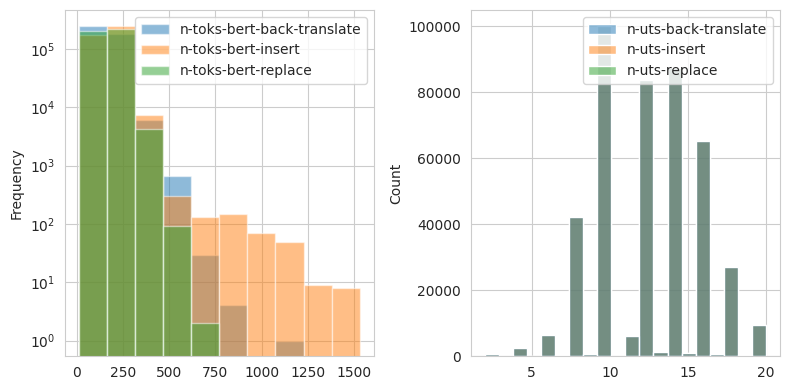

In [2]:
print_report('data/reports/trivial', aug_names=['back-translate', 'insert', 'replace'])

TOTAL SAMPLES: 434094

SAMPLES OF EACH AUGMENTATION:
replace    434094
prune      430995
shuffle    275715
dtype: int64

SAMPLES WITH EXCEEDING TOKENS:

BERT:
n-toks-bert-replace    0.000069
n-toks-bert-prune      0.000002
n-toks-bert-shuffle    0.000051
dtype: float64

RoBERTa:
n-toks-roberta-replace    0.000055
n-toks-roberta-prune      0.000005
n-toks-roberta-shuffle    0.000046
dtype: float64

RetroMAE:
n-toks-retromae-replace    0.000069
n-toks-retromae-prune      0.000002
n-toks-retromae-shuffle    0.000051
dtype: float64


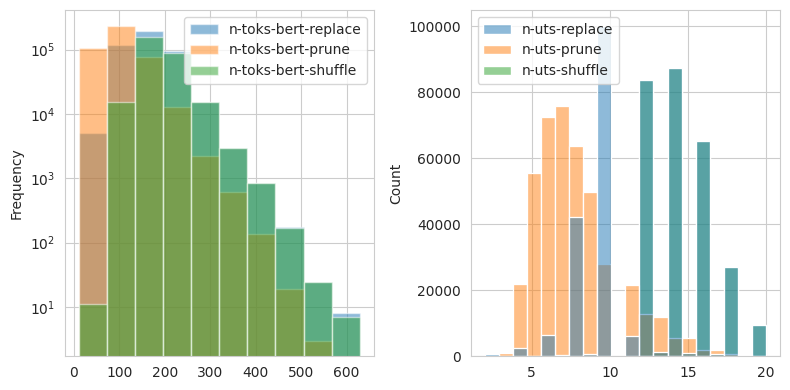

In [4]:
print_report('data/reports/advanced', aug_names=['replace', 'prune', 'shuffle'])

TOTAL SAMPLES: 434094

SAMPLES OF EACH AUGMENTATION:
replace                 434094
back-translate-prune    430771
prune-insert            430995
prune-replace           430995
dtype: int64

SAMPLES WITH EXCEEDING TOKENS:

BERT:
n-toks-bert-replace                 0.000069
n-toks-bert-back-translate-prune    0.000009
n-toks-bert-prune-insert            0.000435
n-toks-bert-prune-replace           0.000002
dtype: float64

RoBERTa:
n-toks-roberta-replace                 0.000055
n-toks-roberta-back-translate-prune    0.000009
n-toks-roberta-prune-insert            0.000071
n-toks-roberta-prune-replace           0.000005
dtype: float64

RetroMAE:
n-toks-retromae-replace                 0.000069
n-toks-retromae-back-translate-prune    0.000009
n-toks-retromae-prune-insert            0.000435
n-toks-retromae-prune-replace           0.000002
dtype: float64


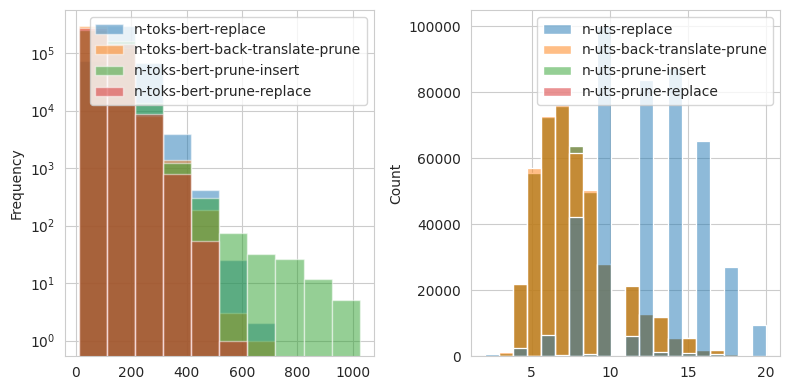

In [5]:
print_report('data/reports/crazy', aug_names=['replace', 'back-translate-prune', 'prune-insert', 'prune-replace'])

TOTAL SAMPLES: 434094

SAMPLES OF EACH AUGMENTATION:
replace            434094
shuffle-insert     275715
shuffle-replace    275715
dtype: int64

SAMPLES WITH EXCEEDING TOKENS:

BERT:
n-toks-bert-replace            0.000069
n-toks-bert-shuffle-insert     0.004326
n-toks-bert-shuffle-replace    0.000065
dtype: float64

RoBERTa:
n-toks-roberta-replace            0.000055
n-toks-roberta-shuffle-insert     0.004144
n-toks-roberta-shuffle-replace    0.000051
dtype: float64

RetroMAE:
n-toks-retromae-replace            0.000069
n-toks-retromae-shuffle-insert     0.004326
n-toks-retromae-shuffle-replace    0.000065
dtype: float64


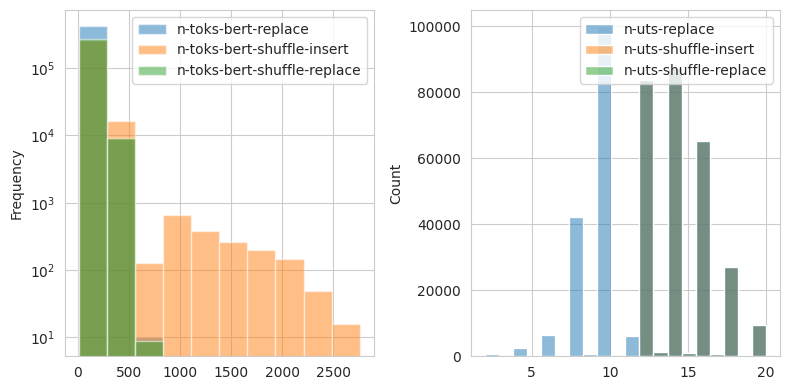

In [6]:
print_report('data/reports/crazy', aug_names=['replace', 'shuffle-insert', 'shuffle-replace'])

## bench

In [1]:
from ruconveval.src.task import Task, TaskConfig, TaskType, DatasetConfig

dataset_config = DatasetConfig(
    dataset='massive',
    language='en'
)

task_config = TaskConfig(
    task=TaskType.classification,
    dataset_config=dataset_config
)

/home/alekseev/dialogue-augmentation/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'src'

## save model

In [1]:
from mylib.learners import DialogueEncoderLearner as Learner, DialogueEncoderLearnerConfig as LearnerConfig
from mylib.modeling.dialogue import BaselineDialogueEncoder as Model, BaselineDialogueEncoderConfig as ModelConfig

model_config = ModelConfig(hf_model='google-bert/bert-base-uncased')
model = Model(model_config)

ckpt_path = 'logs/comet/dialogue-encoder/ba6388e710684d94af81ebab88c2ff5a/checkpoints/epoch=4-step=8460.ckpt'
learner_config = LearnerConfig()
learner = Learner.load_from_checkpoint(
    checkpoint_path=ckpt_path,
    map_location='cpu',
    model=model,
    config=learner_config
)

In [3]:
model = learner.model.model
type(model)

transformers.models.bert.modeling_bert.BertModel

In [4]:
model.save_pretrained('pretrained/bert-fair-trivial')

In [6]:
learner.model.tokenizer.save_pretrained('pretrained/bert-fair-trivial')

('pretrained/bert-fair-trivial/tokenizer_config.json',
 'pretrained/bert-fair-trivial/special_tokens_map.json',
 'pretrained/bert-fair-trivial/vocab.txt',
 'pretrained/bert-fair-trivial/added_tokens.json',
 'pretrained/bert-fair-trivial/tokenizer.json')

## filter by source

In [1]:
from datasets import load_from_disk

dataset = load_from_disk('data/train-bert/trivial')
len(dataset)

Loading dataset from disk:   0%|          | 0/64 [00:00<?, ?it/s]

433340

In [3]:
augs = [aug['augmentation'] for aug in dataset[0]['pos']]
augs

['back-translate', 'insert', 'replace']

In [4]:
mapped = dataset.map(
    lambda pos: {'pos': [aug for aug in pos if aug['augmentation'] != 'back-translate']},
    input_columns='pos',
)

Map:   0%|          | 0/433340 [00:00<?, ? examples/s]

In [5]:
mapped[0]

{'source_dataset_name': 'AirDialogue',
 'idx_within_source': 185688,
 'id': 360925,
 'pos': [{'augmentation': 'insert',
   'content': [{'speaker': 0, 'utterance': 'Hello Hello.'},
    {'speaker': 1, 'utterance': 'Hello, How can I assist you?'},
    {'speaker': 0,
     'utterance': 'I am very much excited to visit Ellenville Fault ed Ice Caves in New York - EWR, can you please reserve a flight from Houston - IAH?'},
    {'speaker': 1, 'utterance': 'Sure, May I know the travelling dates?'},
    {'speaker': 0, 'utterance': 'PS My travel dates are Apr 28th and 30th.'},
    {'speaker': 1, 'utterance': 'Do ing you have any connection limit?'},
    {'speaker': 0,
     'utterance': 'Yes I am fine with maximum one GB connection.'},
    {'speaker': 1, 'utterance': 'May I know your name?'},
    {'speaker': 0, 'utterance': 'My name is Gary Evans.'},
    {'speaker': 1, 'utterance': 'Â Please wait a minute.'},
    {'speaker': 0,
     'utterance': 'Q Please make sure, I want to depart in the evening.

## lightning to hugging face

In [1]:
from mylib.modeling.dialogue import BaselineDialogueEncoderConfig, BaselineDialogueEncoder


def get_raw_model(model_config: BaselineDialogueEncoderConfig):
    model = BaselineDialogueEncoder(model_config)
    model.requires_grad_(False)
    return model

In [2]:
from mylib.learners import DialogueEncoderLearner, DialogueEncoderLearnerConfig


def get_pretrained_model(model, init_from):
    return DialogueEncoderLearner.load_from_checkpoint(
        checkpoint_path=init_from,
        model=model,
        config=DialogueEncoderLearnerConfig()
    ).model.model

In [3]:
checkpoint_codenames ={
    'google-bert/bert-base-uncased':
    {
        'trivial': "ba6388e710684d94af81ebab88c2ff5a",
        'advanced': "0d0b24e2d3864cf8a6c8b7d5e15b1c83",
        'crazy' :"d7e24b7b434e486d866f35d70ac0c503"
    },
    'FacebookAI/roberta-base':
    {
        'trivial': "e4fa2d98923e4c8ca4fbe20c7ccc4c67",
        'advanced': "849fa15859484683a4341837e7d1dd1d",
        'crazy': "523da04c3c5a41379acc298ee09c7a0a"
    },
    'Shitao/RetroMAE':
    {
        'trivial': "408af9ac5d114a9da1fa007277343f15",
        'advanced': "e2de548066f14753bdf9a646e992c02f",
        'crazy' :"ca66a8cd07c4418daea805093d00cdd3"
    }
}

In [4]:
from glob import glob

def get_files(ckpt_code):
    return glob(f"logs/comet/dialogue-encoder/{ckpt_code}/checkpoints/*.ckpt")

get_files('ca66a8cd07c4418daea805093d00cdd3')

['logs/comet/dialogue-encoder/ca66a8cd07c4418daea805093d00cdd3/checkpoints/epoch=2-step=5055.ckpt',
 'logs/comet/dialogue-encoder/ca66a8cd07c4418daea805093d00cdd3/checkpoints/epoch=3-step=6740.ckpt',
 'logs/comet/dialogue-encoder/ca66a8cd07c4418daea805093d00cdd3/checkpoints/epoch=0-step=1685.ckpt',
 'logs/comet/dialogue-encoder/ca66a8cd07c4418daea805093d00cdd3/checkpoints/epoch=4-step=8425.ckpt',
 'logs/comet/dialogue-encoder/ca66a8cd07c4418daea805093d00cdd3/checkpoints/epoch=1-step=3370.ckpt']

In [5]:
from transformers import AutoTokenizer

def to_hugging_face(ckpt_path, model_config, path_out):
    model = get_raw_model(model_config)
    model = get_pretrained_model(model, ckpt_path)
    model.save_pretrained(path_out)
    tok = AutoTokenizer.from_pretrained(model_config.hf_model)
    tok.save_pretrained(path_out)

In [10]:
for backbone_name in checkpoint_codenames.keys():
    model_config = BaselineDialogueEncoderConfig(hf_model=backbone_name)
    for aug_set in ['trivial', 'advanced', 'crazy']:
        for ckpt in get_files(checkpoint_codenames[backbone_name][aug_set]):
            backbone_for_path = backbone_name.replace('/', '-')
            ckpt_for_path = ckpt.split('/')[-1].split('-')[0]
            to_hugging_face(ckpt, model_config, f'pretrained/{backbone_for_path}/{aug_set}/{ckpt_for_path}')

Some weights of RobertaModel were not initialized from the model checkpoint at FacebookAI/roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at FacebookAI/roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at FacebookAI/roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at FacebookAI/robe

## inspecting sgd

In [22]:
from datasets import load_from_disk

dataset = load_from_disk('data/benchmarks/MultiWOZ_2.1')
dataset

DatasetDict({
    train: Dataset({
        features: ['content', 'source_dataset_name', 'idx_within_source', 'services'],
        num_rows: 2979
    })
    validation: Dataset({
        features: ['content', 'source_dataset_name', 'idx_within_source', 'services'],
        num_rows: 204
    })
    test: Dataset({
        features: ['content', 'source_dataset_name', 'idx_within_source', 'services'],
        num_rows: 226
    })
})

In [23]:
import numpy as np

a = dataset['train']['services']
np.sum(a, axis=0)

array([ 127,  287,  513, 1199,  326,  282])

In [24]:
a = dataset['test']['services']
np.sum(a, axis=0)

array([12,  0, 67, 62, 52, 33])

In [25]:
a = dataset['validation']['services']
np.sum(a, axis=0)

array([11,  0, 56, 50, 57, 30])

## SFR Embeddings

In [2]:

# from argparse import ArgumentParser

# ap = ArgumentParser()
# ap.add_argument('--seed', default=0, type=int)
# ap.add_argument('--path-in', required=True)
# ap.add_argument('--path-out', required=True)
# ap.add_argument('--model', required=True)
# ap.add_argument('--pooling', choices=['cls', 'avg', 'last'], required=True)
# ap.add_argument('--batch-size', required=True, type=int)
# ap.add_argument('--cuda', required=True)
# args = ap.parse_args()

from dataclasses import dataclass

@dataclass
class Args:
    seed=0
    path_in='data/benchmarks-bert/sgd/train'
    path_out='data/scatter-analysis/sfrtest-embedded/sgd'
    model='Salesforce/SFR-Embedding-Mistral'
    pooling='last'
    batch_size=16
    cuda="0"

args = Args()


from mylib.utils.training import init_environment
init_environment(args)

# load model
from mylib.modeling.dialogue import BaselineDialogueEncoder, BaselineDialogueEncoderConfig

config = BaselineDialogueEncoderConfig(
    hf_model=args.model,
    pooling=args.pooling,
    truncation=True,
    max_length=4096 if args.pooling == 'last' else 512
)
if args.pooling == 'last':
    # LLM
    kwargs = dict()
else:
    # BERT-like
    kwargs = {}
encoder = BaselineDialogueEncoder(config, **kwargs).cuda().eval()

# load data
from datasets import load_from_disk, disable_caching
disable_caching()

dataset = load_from_disk(args.path_in)

# feed to model and collect embeddings
from torch import no_grad

with no_grad():
    dataset = dataset.map(
        lambda batch: {'embedding': encoder(batch).detach().cpu().numpy()},
        input_columns='content',
        batched=True,
        batch_size=args.batch_size
    )

# save to disk
dataset.save_to_disk(args.path_out)


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Map:   0%|          | 0/6911 [00:00<?, ? examples/s]

KeyboardInterrupt: 

In [2]:
batch_dict = batch_dict.to('cuda')

In [3]:
model = AutoModel.from_pretrained(
    "Salesforce/SFR-Embedding-Mistral",
    device_map='auto',
    load_in_8bit=True
)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [4]:

outputs = model(**batch_dict)
embeddings = last_token_pool(outputs.last_hidden_state, batch_dict["attention_mask"])

# normalize embeddings
embeddings = F.normalize(embeddings, p=2, dim=1)
scores = (embeddings[:2] @ embeddings[2:].T) * 100
print(scores.tolist())
# [[86.7153549194336, 36.64569091796875], [35.00493621826172, 82.0738525390625]]


[[86.5625, 36.75], [34.84375, 82.0625]]
